In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

plt.style.use(["bmh", "science", "notebook", "grid"])

In [3]:
# loading all packages
imp_30hz = np.load("J:/Universidade/GIECAR/Data/impedance_30hz.npy")
imp_background = np.load("J:/Universidade/GIECAR/Data/impedance_background.npy")
inverted_impedance_final_butter = np.load(
    "J:/Universidade/GIECAR/Data/inverted_impedance_butter.npy"
)
inverted_impedance_final_ricker = np.load(
    "J:/Universidade/GIECAR/Data/inverted_impedance_ricker.npy"
)
residuo_ricker = np.load("J:/Universidade/GIECAR/Data/residuo_ricker.npy")
residuo_butter = np.load("J:/Universidade/GIECAR/Data/residuo_butter.npy")

Colors

In [33]:
PRIMARY = "royalblue"
PRIMARY_DARK = "navy"
SECONDARY = "mediumseagreen"
SECONDARY_DARK = "darkgreen"
TERCIARY = "firebrick"
ALTERNATIVE = "darkorange"
TEXT_COLOR = "#212121"
plt.rc("font", family="Arial")

In [5]:
ricker_inv = inverted_impedance_final_ricker
butter_inv = inverted_impedance_final_butter

nx, ny, nz = imp_30hz.shape

### MAPE

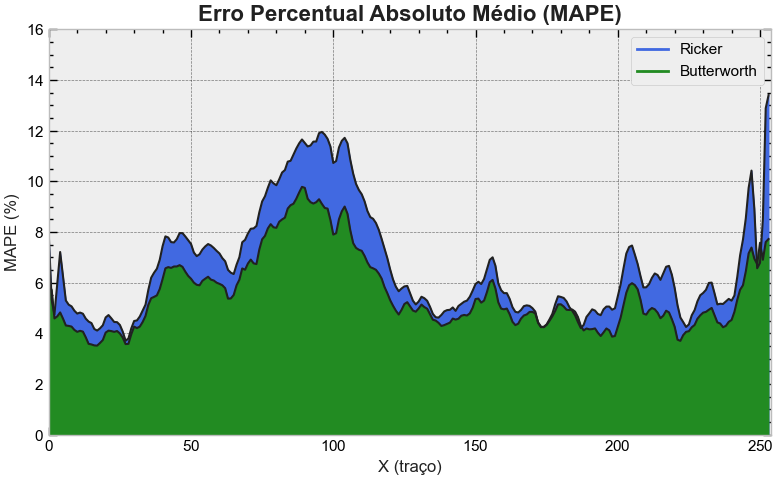

In [6]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import matplotlib.lines as mlines

mape_ricker = np.zeros(nx)
mape_butter = np.zeros(nx)

for ix in range(nx):
    mape_ricker[ix] = MAPE(imp_30hz[ix, 128, :], ricker_inv[ix, 128, :]) * 100
    mape_butter[ix] = MAPE(imp_30hz[ix, 128, :], butter_inv[ix, 128, :]) * 100

mape_ricker = np.delete(mape_ricker, slice(0, 2))
mape_butter = np.delete(mape_butter, slice(0, 2))


plt.figure(figsize=(8, 5))

plt.plot(
    mape_ricker,
    "-",
    label="Ricker",
    ms=2,
    linewidth=1.5,
    color=TEXT_COLOR,
    markeredgecolor="black",
    markeredgewidth=0.5,
)
plt.fill_between(range(len(mape_ricker)), mape_ricker, color=PRIMARY)

plt.plot(
    mape_butter,
    "-",
    label="Butterworth",
    ms=2,
    linewidth=1.5,
    color=TEXT_COLOR,
    markeredgecolor="black",
    markeredgewidth=0.5,
)
plt.fill_between(range(len(mape_butter)), mape_butter, color=SECONDARY)

# Create custom legend lines
line_ricker = mlines.Line2D(
    [], [], color=PRIMARY, marker="_", markersize=15, label="Ricker"
)
line_butter = mlines.Line2D(
    [], [], color=SECONDARY, marker="_", markersize=15, label="Butterworth"
)

plt.title(
    "Erro Percentual Absoluto Médio (MAPE)",
    fontsize=16,
    fontweight="bold",
    color=TEXT_COLOR,
)
plt.xlabel("X (traço)", fontsize=12, color=TEXT_COLOR)
plt.ylabel("MAPE (%)", fontsize=12, color=TEXT_COLOR)
plt.tick_params(axis="both", labelsize=11)
plt.legend(handles=[line_ricker, line_butter], loc="upper right", fontsize=11)
plt.ylim(0, 16)
plt.xlim(0, 254)

plt.tight_layout()
plt.savefig("simposio_figs/mape.png", dpi=500, bbox_inches="tight")
plt.show()

In [7]:
# Create a DataFrame with mape_ricker and mape_butter
df_mape = pd.DataFrame({"mape_ricker": mape_ricker, "mape_butter": mape_butter})

# Export the DataFrame to a CSV file
df_mape.to_csv("mape_data.csv", index=False)

In [10]:
MAPE_b = np.delete(mape_butter, slice(0, 2))
MAPE_r = np.delete(mape_ricker, slice(0, 2))

In [11]:
print(f"A média do MAPE de Ricker é: {np.mean(MAPE_r):.2f}%")
print(f"A média do MAPE de Butterworth é: {np.mean(MAPE_b):.2f}%")

A média do MAPE de Ricker é: 6.67%
A média do MAPE de Butterworth é: 5.58%


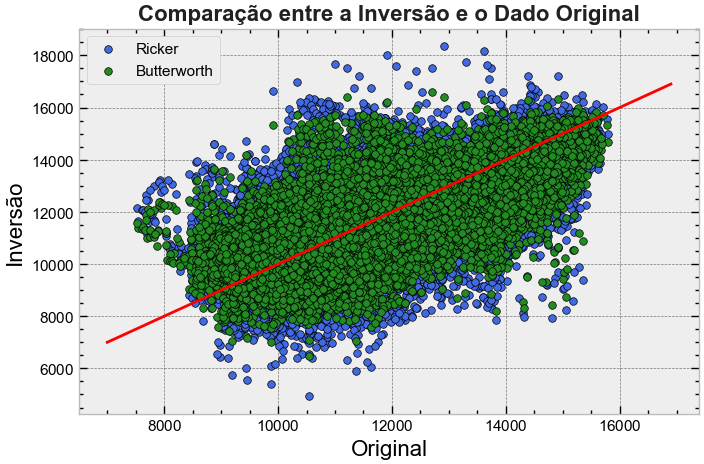

In [12]:
# iterar sobre o primeiro :, que é o x, x,y,z
x = np.arange(7000, 17000, 100)

plt.figure(figsize=(8, 5))

plt.scatter(
    imp_30hz[:, 128, :].T,
    inverted_impedance_final_ricker[:, 128, :].T,
    s=30,
    color=PRIMARY,
    label="Ricker",
    edgecolors="black",
    linewidth=0.5,
)
plt.scatter(
    imp_30hz[:, 128, :].T,
    inverted_impedance_final_butter[:, 128, :].T,
    s=30,
    label="Butterworth",
    color=SECONDARY,
    edgecolors="black",
    linewidth=0.5,
)

plt.title(
    "Comparação entre a Inversão e o Dado Original",
    fontsize=16,
    fontweight="bold",
    color=TEXT_COLOR,
)
plt.ylabel("Inversão")
plt.xlabel("Original")
plt.plot(x, x, color="red")
plt.tick_params(axis="both", labelsize=11)
plt.legend(loc="upper left", fontsize=11)
plt.savefig("simposio_figs/inversaoxoriginal.png", dpi=300, bbox_inches="tight")
plt.show()
# abaixo da reta subestimando os valores de impedancia
# acima da reta superestimando os valores de impedancia

In [64]:
from scipy import stats

# 32, 64, 128, 196, 256
values = np.arange(0, 254, 8)

# section = 254
correlation_residuo_rb = np.zeros(len(values))
correlation_or = np.zeros(len(values))
correlation_ob = np.zeros(len(values))
correlation_rb = np.zeros(len(values))

for i, value in enumerate(values):

    correlation_or[i] = stats.pearsonr(
        imp_30hz[:, value, :].flatten(),
        inverted_impedance_final_ricker[:, value, :].flatten(),
    )[0]

    correlation_ob[i] = stats.pearsonr(
        imp_30hz[:, value, :].flatten(),
        inverted_impedance_final_butter[:, value, :].flatten(),
    )[0]

print(
    f"A correlação de Pearson entre o original e a inversão de Ricker é: {np.mean(correlation_or):.2f}"
)
print(
    f"A correlação de Pearson entre o original e a inversão de Butterworth é: {np.mean(correlation_ob):.2f}"
)

A correlação de Pearson entre o original e a inversão de Ricker é: 0.65
A correlação de Pearson entre o original e a inversão de Butterworth é: 0.73


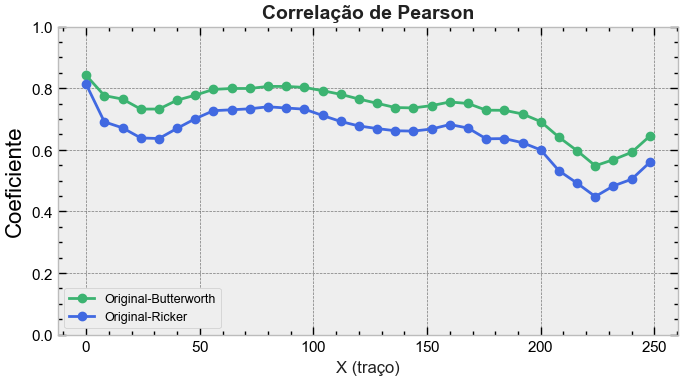

In [69]:
plt.figure(figsize=(8, 4))

plt.plot(
    values, correlation_ob, "o-", label="Original-Butterworth", lw=2, color=SECONDARY
)
plt.plot(values, correlation_or, "o-", label="Original-Ricker", lw=2, color=PRIMARY)

plt.title("Correlação de Pearson", fontsize=14, fontweight="bold", color=TEXT_COLOR)


plt.legend(loc="lower left", fontsize=9)
plt.ylim(0, 1.00)
plt.tick_params(axis="both", labelsize=11)
plt.ylabel("Coeficiente")
plt.xlabel("X (traço)", fontsize=12, color=TEXT_COLOR)

plt.savefig("simposio_figs/correlacao_pearson.png", dpi=300, bbox_inches="tight")
plt.show()

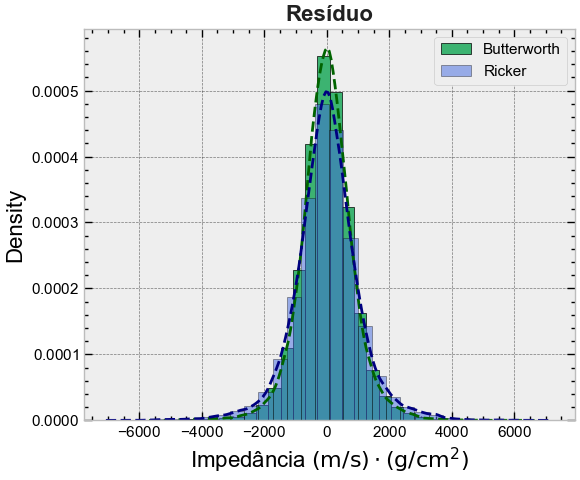

In [50]:
import seaborn as sns

bins = 30

# plt.figure(figsize=(6,5))
plt.figure(figsize=(6, 5))

# Flatten the 3D array to 1D
residuo_flat_ricker = residuo_ricker[:, 128, :].flatten()
residuo_flat_butter = residuo_butter[:, 128, :].flatten()

# Create a histogram for butter
plt.hist(
    residuo_flat_butter,
    bins=bins,
    density=True,
    edgecolor="black",
    color=SECONDARY,
    alpha=1.0,  # Adjust transparency here
    label="Butterworth",
)

# Create a KDE plot for butter
sns.kdeplot(
    residuo_flat_butter, color=SECONDARY_DARK, linewidth=2, linestyle="--", alpha=1.0
)

# Create a histogram for ricker
plt.hist(
    residuo_flat_ricker,
    bins=bins,
    density=True,
    edgecolor="black",
    color=PRIMARY,
    alpha=0.5,  # Adjust transparency here
    label="Ricker",
)

# Create a KDE plot for ricker
sns.kdeplot(
    residuo_flat_ricker, color=PRIMARY_DARK, linewidth=2, linestyle="--", alpha=1.0
)


plt.tick_params(axis="both", labelsize=11)
plt.title("Resíduo", fontsize=16, fontweight="bold", color=TEXT_COLOR)
plt.xlabel(r"Impedância $(\text{m}/\text{s})\cdot(\text{g}/\text{cm}^{2})$")
plt.legend()


# plt.suptitle('Distribuição do Residuo', fontsize=16, fontweight='bold', color=TEXT_COLOR)

plt.legend(loc="upper right", fontsize=11)

# Show the plot
plt.tight_layout()
plt.savefig("simposio_figs/distribuicao_residuo.png", dpi=500, bbox_inches="tight")
plt.show()